In [109]:
# importing tools
import random
import matplotlib.pyplot as plt

# dark mode style
plt.style.use("seaborn")

In [110]:
# =============== game init ===============

# creating board
board = [
    38, 2, 3, 14, 5, 6, 7, 8, 31, 10,
    11, 12, 13, 14, 15, 6, 17, 18, 19, 20,
    42, 22, 23, 24, 25, 26, 27, 84, 29, 30,
    31, 32, 33, 34, 35, 44, 37, 38, 39, 40,
    41, 42, 43, 44, 45, 46, 47, 26, 11, 50,
    67, 52, 53, 54, 55, 53, 57, 58, 59, 69,
    61, 19, 63, 60, 65, 66, 67, 68, 69, 70,
    91, 72, 73, 74, 75, 76, 77, 78, 79, 100,
    81, 82, 83, 84, 85, 86, 24, 88, 89, 90,
    91, 92, 73, 94, 75, 96, 97, 78, 99, 100
];

# creating dice
dice = [
    [4, 4, 4, 4, 0, 0],
    [6, 6, 2, 2, 2, 2],
    [5, 5, 5, 1, 1, 1],
    [3, 3, 3, 3, 3, 3]
];

# roll function
def rollDie(die):
#     Function: rollDie, a function that rolls the
#     die specified by the die parameter
    
#     Parameter(s):
        
#         die - the die either 0, 1, 2, or 3
        
#     Return Value(s):
        
#         result

    # getting random between 0 and 5
    n = random.randint(0, 5);
#     print(n, dice[die][n])
    # returning die result
    return dice[die][n];

In [97]:
# =============== q learning init ===============

# initializing q table
q = [[0, 0, 0, 0] for state in board];

# initialzing policy
p = [2 for state in board];

# =============== q learning algo ===============

# epsilon_greedy
def epsilon_greedy(epsilon, pos):
#     Function: epsilon_greedy, a function that returns an action
    
#     Parameter(s):
        
#         epsilon - how likely a discovery action is
#         pos - the current state/position on the board
        
#     Return Value(s):
#         an action
    
    return random.randint(0, 3) if random.random() < epsilon else p[pos];
    

def q_learning(alpha, epsilon):
# Function: q_learning, a function that implements the q learning algorithm

# Parameter(s):
    
#     alpha - learning rate
#     epsilon - exploration rate
    
# Return Value(s):
    
#     None but q and p are modified

    # initializing position on board
    pos = 0;

    while board[pos] != 100:
        # getting epsilon_greedy action
        a = epsilon_greedy(epsilon, pos);

        # rolling die
        roll = rollDie(a);
        # saving pos
        old_pos = pos;
        # moving forward
        pos = board[pos + roll if pos + roll <= 99 else 99] - 1;

        # getting td err
        td_err = (q[pos][p[pos]] + 1) - q[old_pos][a];

        # learning
        q[old_pos][a] += alpha * td_err;
        # updating policy
        p[old_pos] = q[old_pos].index(min(q[old_pos])) if min(q[old_pos]) < q[old_pos][p[old_pos]] else p[old_pos];


In [ ]:
# evaluating optimal policy produced
def policy_eval():
#     Function: policy_eval, a function that evaluates the optimal policy
#     produced
    
#     Parameter(s):
        
#         None
        
#     Return Value(s):
        
#         Number of steps to win

    # starting on place one
    pos = 0;
    
    # initialzing counter to 0
    c = 0;
    
    while board[pos] != 100:
        
        # getting action from policy
        a = p[pos];
        
        # rolling die
        roll = rollDie(a);

        # moving forward
        pos = board[pos + roll if pos + roll <= 99 else 99] - 1;

        # incrementing counter
        c += 1;
        
    # returning counter
    return c;

1000
950
900
850
800
750
700
650
600
550
500
450
400
350
300
250
100
75


Text(0.5, 1.0, 'Iterations vs Average number of rolls')

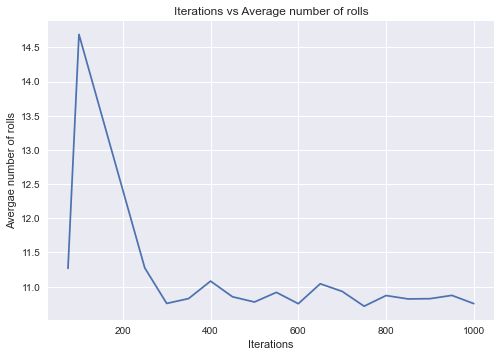

In [124]:
# defining possible iters
# iters = [10000, 7500, 5000, 2500, 1000, 750, 500, 250, 100, 75];
iters = [1000, 950, 900, 850, 800, 750, 700, 650, 600, 550, 500, 450, 400, 350, 300, 250, 100, 75];
# initializing data collection arrays
n_iters = [];
scores = [];
policies = [];

# training different numbers of iterations on same policy
for n in range(len(iters)):
    # =============== q learning init ===============
    print(iters[n])
    # initializing q table
    q = [[0, 0, 0, 0] for state in board];

    # initialzing policy
    p = [2 for state in board];
    
    # learning over many iterations
    for i in range(iters[n]):
        q_learning(1, 0.1);
    # decreasing learning rate and discover rate
    for i in range(iters[n]):
        q_learning(0.5, 0.05);
    # decreasing learning and discover rate
    for i in range(iters[n]):
        q_learning(0.1, 0.01);
        
        
    # initializing score and number of rolls
    score = 0;
    rolls = 0;

    # evaluating policy by finding average number of rolls for 10000
    for i in range(10000):
        # playing 
        score += policy_eval();
        # incrementing counter
        rolls += 1;

    # appending to array
    n_iters.append(iters[n]);
    scores.append(score / rolls)
    
# printing scores
plt.plot(n_iters, scores);

plt.xlabel("Iterations")  # Add an x-label to the axes.
plt.ylabel("Avergae number of rolls")  # Add a y-label to the axes.
plt.title("Iterations vs Average number of rolls") 